In [ ]:
#ml stacking

#https://colab.research.google.com/drive/1a7KUtLsRWnPejRCwH4r1sZk2vM-JGTYY

In [ ]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStoppingmport math
import matplotlib.pyplot as plt
im
df=pd.read_csv("/content/ACI.csv",parse_dates=['DATE'])
df.tail()

ImportError: ignored

In [ ]:
df.shape 

(439, 12)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

 Aggression_detection
 annotation
 Annotation-data
 assignment
 assignment1.zip
 assignment.ipynb
 assignment_ML
 assignment_shapna.zip
'BANGLA OCR'
 Classroom
 CNN
'Colab Notebooks'
 conference-template-a4.docx
 consent_form_1721568042.docx
'consent form.docx'
'Cooking vlog-shapna '
 cv.docx
 deeplearning
'DevOps Engineer.jpg'
 Diabetes_prediction
'dogs-vs-cats '
'ECO Lecture -3.gdoc'
'emu8086.zip (Unzipped Files)'
 finalExam_cse445.docx
 FinalExam_mst.shapna-akter_1721568042.docx
 finalNepal.xls
 finalreport.rtf
 full_traindata.zip
 FUwangfood.ipynb
'Getting started.pdf'
'housing price prediction'
 housingPrice_testDataHandle.ipynb
 implementation_LSTM
 LAB2_1721568042.zip
 LAB4_1721568042.zip
 labeledTrainData.tsv
 mask
'mid -missing part.pdf'
 midterm_1721568042.docx
 midterm_ML
 ML_midterm_1721568042.docx
 ModelFile.zip
'mst shapna akter_1721568042.docx'
 mst_shapna_akter_1721568042.docx
 mst.shapna-akter_1721568042.docx
'mst shapna akter-1721568042-sec09.pdf'
 mst.shapna-akter_17

In [ ]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
36  403 2018-01-10          ACI  344.5  ...  340.0    270       6.432  18,549
59  380 2018-01-11          ACI  350.4  ...  349.6    328      10.607  30,276
37  402 2018-02-10          ACI  347.5  ...  345.3    199       3.682  10,600
79  360 2018-02-12          ACI  322.2  ...  325.2    294       5.220  16,130
16  423 2018-03-09          ACI  364.0  ...  366.5    437      13.092  35,969

[5 rows x 12 columns]

In [ ]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE   LTP*   HIGH  ...    YCP  TRADE  VALUE (mn)  VOLUME
DATE                                        ...                                  
2018-01-10  403          ACI  344.5  352.8  ...  340.0    270       6.432  18,549
2018-01-11  380          ACI  350.4  351.6  ...  349.6    328      10.607  30,276
2018-02-10  402          ACI  347.5  349.0  ...  345.3    199       3.682  10,600

[3 rows x 11 columns]

In [ ]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [ ]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [ ]:
df['volatility'] = df['volatility']*100

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
df=df.reset_index()['volatility']

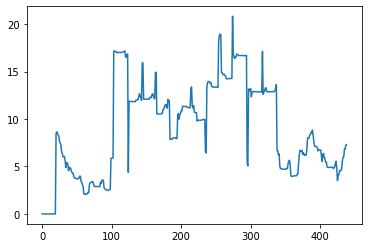

In [ ]:
plt.plot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df.shape

(439, 1)

In [ ]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
ytest.shape

(31,)

In [ ]:

print(X_test.shape)

(31, 100)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_test.shape

(31, 100, 1)

In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAci/model3.h5"

In [ ]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 76ms/step - loss: 0.1315 - val_loss: 0.0052
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0508 - val_loss: 0.0216
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0283 - val_loss: 0.0196
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0205 - val_loss: 0.0171
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0166 - val_loss: 0.0287
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0136 - val_loss: 0.0342
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0111 - val_loss: 0.0187
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0132 - val_loss: 0.0203
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0135 - val_loss: 0.0254
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0106 - val_loss: 0.0183
Epoch 11/100
7/7 [=

In [ ]:
model1.save(filepath1)

In [ ]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 291ms/step - loss: 0.1973 - val_loss: 0.0566
Epoch 2/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0418 - val_loss: 0.0070
Epoch 3/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0341 - val_loss: 0.0505
Epoch 4/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0260 - val_loss: 0.0266
Epoch 5/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0246 - val_loss: 0.0314
Epoch 6/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0220 - val_loss: 0.0460
Epoch 7/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0175 - val_loss: 0.0346
Epoch 8/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0205 - val_loss: 0.0457
Epoch 9/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0201 - val_loss: 0.0397
Epoch 10/100
7/7 [==============================] - 1s 146ms/step - loss: 0.0206 - val_loss: 0.0436
Epoch 11/

In [ ]:
model2.save(filepath2)

In [ ]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 12s 530ms/step - loss: 0.2117 - val_loss: 0.1127
Epoch 2/100
7/7 [==============================] - 2s 240ms/step - loss: 0.0362 - val_loss: 0.0159
Epoch 3/100
7/7 [==============================] - 2s 247ms/step - loss: 0.0304 - val_loss: 0.0726
Epoch 4/100
7/7 [==============================] - 2s 239ms/step - loss: 0.0250 - val_loss: 0.0244
Epoch 5/100
7/7 [==============================] - 2s 243ms/step - loss: 0.0169 - val_loss: 0.0292
Epoch 6/100
7/7 [==============================] - 2s 245ms/step - loss: 0.0170 - val_loss: 0.0301
Epoch 7/100
7/7 [==============================] - 2s 246ms/step - loss: 0.0182 - val_loss: 0.0159
Epoch 8/100
7/7 [==============================] - 2s 241ms/step - loss: 0.0138 - val_loss: 0.0296
Epoch 9/100
7/7 [==============================] - 2s 243ms/step - loss: 0.0142 - val_loss: 0.0170
Epoch 10/100
7/7 [==============================] - 2s 241ms/step - loss: 0.0147 - val_loss: 0.0225
Epoch 11

In [ ]:
model3.save(filepath3)


In [ ]:
from keras.models import load_model

In [ ]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsAbbank/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [ ]:
print(len(all_models))

3


In [ ]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsAbbank/model1.h5'
model = load_model(f1)


In [ ]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [ ]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [ ]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

4.814139833028011

In [ ]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [ ]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

In [ ]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [ ]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [ ]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

the submodels are prepared

In [ ]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [ ]:
stacked_model = define_stacked_model(all_models)

In [ ]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [ ]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [ ]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [ ]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.2167487 , 0.21910483, 0.23746046],
       [0.24574223, 0.24829698, 0.24222988],
       [0.24653433, 0.24788508, 0.24149609],
       [0.25964153, 0.26057792, 0.24805629],
       [0.26213455, 0.2609166 , 0.24706274],
       [0.25009418, 0.24540979, 0.23830679],
       [0.24606343, 0.23894006, 0.23487422],
       [0.23675282, 0.22749794, 0.22935301],
       [0.23783107, 0.22807264, 0.2305046 ],
       [0.24565698, 0.23665613, 0.23610085],
       [0.2439847 , 0.23558483, 0.23686627],
       [0.23049659, 0.2222552 , 0.23203498],
       [0.23359708, 0.2269359 , 0.23596206],
       [0.23864244, 0.23349106, 0.2404125 ],
       [0.23945086, 0.23546216, 0.2426598 ],
       [0.23567627, 0.23269069, 0.24270543],
       [0.23799685, 0.23733017, 0.24751174],
       [0.2357782 , 0.23791131, 0.25037518],
       [0.2369137 , 0.24049252, 0.2510744 ],
       [0.23912069, 0.24027666, 0.24623516],
       [0.24035138, 0.23817122, 0.24279091],
       [0.25677535, 0.25264862, 0.24853411],
       [0.

In [ ]:
yhat =scaler.inverse_transform(yhat)

In [ ]:
yhat

array([[4.51643  , 4.565525 , 4.9480042],
       [5.120573 , 5.1738067, 5.0473857],
       [5.1370783, 5.165224 , 5.0320954],
       [5.410195 , 5.4297066, 5.168792 ],
       [5.4621425, 5.436764 , 5.148089 ],
       [5.211255 , 5.113646 , 4.9656396],
       [5.127266 , 4.978835 , 4.8941145],
       [4.933259 , 4.7404137, 4.779068 ],
       [4.955727 , 4.752389 , 4.803064 ],
       [5.118797 , 4.9312444, 4.919674 ],
       [5.083951 , 4.9089212, 4.935623 ],
       [4.802897 , 4.63117  , 4.834953 ],
       [4.8675027, 4.728702 , 4.916782 ],
       [4.9726334, 4.8652935, 5.0095167],
       [4.9894786, 4.9063654, 5.056344 ],
       [4.910827 , 4.848616 , 5.057295 ],
       [4.9591813, 4.9452896, 5.157445 ],
       [4.912951 , 4.957399 , 5.2171106],
       [4.936611 , 5.011184 , 5.2316804],
       [4.982599 , 5.006686 , 5.130844 ],
       [5.008243 , 4.962815 , 5.059076 ],
       [5.350472 , 5.2644825, 5.178748 ],
       [5.5778418, 5.4793205, 5.290261 ],
       [5.7676854, 5.6845274, 5.39

In [ ]:
x, y, z = yhat.T

In [ ]:
x

array([4.51643  , 5.120573 , 5.1370783, 5.410195 , 5.4621425, 5.211255 ,
       5.127266 , 4.933259 , 4.955727 , 5.118797 , 5.083951 , 4.802897 ,
       4.8675027, 4.9726334, 4.9894786, 4.910827 , 4.9591813, 4.912951 ,
       4.936611 , 4.982599 , 5.008243 , 5.350472 , 5.5778418, 5.7676854,
       5.772511 , 5.502747 , 5.354477 , 5.306061 , 5.2416615, 5.3309   ,
       5.378294 ], dtype=float32)

In [ ]:
yhat

array([[4.51643  , 4.565525 , 4.9480042],
       [5.120573 , 5.1738067, 5.0473857],
       [5.1370783, 5.165224 , 5.0320954],
       [5.410195 , 5.4297066, 5.168792 ],
       [5.4621425, 5.436764 , 5.148089 ],
       [5.211255 , 5.113646 , 4.9656396],
       [5.127266 , 4.978835 , 4.8941145],
       [4.933259 , 4.7404137, 4.779068 ],
       [4.955727 , 4.752389 , 4.803064 ],
       [5.118797 , 4.9312444, 4.919674 ],
       [5.083951 , 4.9089212, 4.935623 ],
       [4.802897 , 4.63117  , 4.834953 ],
       [4.8675027, 4.728702 , 4.916782 ],
       [4.9726334, 4.8652935, 5.0095167],
       [4.9894786, 4.9063654, 5.056344 ],
       [4.910827 , 4.848616 , 5.057295 ],
       [4.9591813, 4.9452896, 5.157445 ],
       [4.912951 , 4.957399 , 5.2171106],
       [4.936611 , 5.011184 , 5.2316804],
       [4.982599 , 5.006686 , 5.130844 ],
       [5.008243 , 4.962815 , 5.059076 ],
       [5.350472 , 5.2644825, 5.178748 ],
       [5.5778418, 5.4793205, 5.290261 ],
       [5.7676854, 5.6845274, 5.39

In [ ]:
y

array([3.7207537, 3.765792 , 3.7611315, 3.7685072, 3.759929 , 3.7060778,
       3.6769862, 3.625542 , 3.606664 , 3.6092432, 3.5864034, 3.5086436,
       3.4993637, 3.49259  , 3.4742415, 3.4620016, 3.445534 , 3.3476973,
       3.4000108, 3.5312421, 3.5419507, 3.6040635, 3.6265366, 3.6604238,
       3.6816194, 3.6736684, 3.663358 , 3.6537492, 3.658059 , 3.665817 ,
       3.6701312], dtype=float32)

In [ ]:
avg = (x+y+z)/3

In [ ]:
avg

array([4.676653 , 5.113922 , 5.111466 , 5.336231 , 5.3489985, 5.096847 ,
       5.000072 , 4.81758  , 4.8370605, 4.989905 , 4.9761653, 4.75634  ,
       4.837662 , 4.9491477, 4.9840627, 4.938913 , 5.0206385, 5.0291533,
       5.0598254, 5.040043 , 5.0100446, 5.2645674, 5.449141 , 5.616516 ,
       5.632248 , 5.4197235, 5.35488  , 5.4015293, 5.4335933, 5.6259313,
       5.7686334], dtype=float32)

In [ ]:
avg.shape

(31,)

In [ ]:
y.shape

(31,)

In [ ]:
Y_test.shape

NameError: ignored

In [ ]:
y = np.reshape(y,(1, y.size))
x= np.reshape(x,(1, y.size))
z = np.reshape(z,(1, z.size))

In [ ]:
y.shape

(1, 31)

In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.7061318349811603

In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

0.8074106481088378

In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

0.6766188720483245

In [ ]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,z)
print('MAE: %f' % mae)


MAE: 0.511630


In [ ]:
avg = avg.T

In [ ]:
avg= np.reshape(avg,(1, avg.size))

In [ ]:
avg.shape

(1, 31)

In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

0.7227578984919862

In [ ]:
avg = avg.T

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
Y_test = Y_test.T

In [ ]:
train_predict = predict_stacked_model(stacked_model, X_train)

In [ ]:
y_train.shape

(206,)

In [ ]:
Y_train= np.reshape(y_train,(1, y_train.size))


In [ ]:
Y_train = scaler.inverse_transform(Y_train)

In [ ]:
Y_train

array([[ 5.88400966,  5.89143507,  5.89431315, 17.16522665, 17.16433268,
        17.10954469, 17.12113244, 17.03381286, 16.99945498, 17.02772168,
        17.02338532, 17.0187436 , 17.01381146, 17.01574563, 17.03423148,
        17.03881739, 17.05249705, 17.08051124, 17.13989043, 17.17401812,
        16.55946533, 16.50621098, 16.83321447, 16.84637413,  4.386501  ,
        11.86874838, 11.86551697, 11.86106624, 11.86106624, 11.86106624,
        11.84327629, 11.8405564 , 11.83689363, 11.83230313, 11.83282738,
        11.97131548, 11.9930459 , 12.05632076, 12.05089616, 12.33932958,
        12.66921562, 12.34739179, 12.36863516, 11.98002979, 15.93082407,
        15.91140934, 12.09269217, 12.09259804, 12.09537805, 12.09537805,
        12.09804688, 12.09558756, 12.09580161, 12.09602034, 12.09693725,
        12.29568769, 12.26505722, 12.25781135, 12.58437821, 12.665522  ,
        12.47642042, 12.17425777, 12.14609451, 14.91894622, 14.92420457,
        10.53486935, 10.53877165, 10.53977222, 10.5

In [ ]:
train_predict

array([[0.2247348 , 0.1901254 , 0.14444333],
       [0.23052427, 0.18307811, 0.14026874],
       [0.23212312, 0.19740012, 0.13764402],
       [0.26560086, 0.18879703, 0.10430302],
       [0.2528703 , 0.18261862, 0.12906006],
       [0.25853157, 0.18176763, 0.12714875],
       [0.26019812, 0.18451259, 0.12497784],
       [0.2693082 , 0.19106935, 0.11071184],
       [0.27861893, 0.18582812, 0.09827423],
       [0.2850027 , 0.17265321, 0.09184082],
       [0.27686512, 0.19026321, 0.09851837],
       [0.27586028, 0.18284449, 0.10130366],
       [0.26886725, 0.1942051 , 0.10813659],
       [0.26547617, 0.1922579 , 0.11298022],
       [0.26384297, 0.19136521, 0.11527032],
       [0.26408106, 0.19162703, 0.11481193],
       [0.26322502, 0.19147758, 0.11571112],
       [0.263852  , 0.19189055, 0.11455601],
       [0.2622971 , 0.19215523, 0.1158917 ],
       [0.26976848, 0.19124077, 0.10730142],
       [0.26248357, 0.19407539, 0.11391067],
       [0.26260602, 0.19497505, 0.11290161],
       [0.

In [ ]:
train_predict = DataPrep(train_predict)
train_predict

array([[0.2247348 , 0.1901254 , 0.14444333],
       [0.23052427, 0.18307811, 0.14026874],
       [0.23212312, 0.19740012, 0.13764402],
       [0.26560086, 0.18879703, 0.10430302],
       [0.2528703 , 0.18261862, 0.12906006],
       [0.25853157, 0.18176763, 0.12714875],
       [0.26019812, 0.18451259, 0.12497784],
       [0.2693082 , 0.19106935, 0.11071184],
       [0.27861893, 0.18582812, 0.09827423],
       [0.2850027 , 0.17265321, 0.09184082],
       [0.27686512, 0.19026321, 0.09851837],
       [0.27586028, 0.18284449, 0.10130366],
       [0.26886725, 0.1942051 , 0.10813659],
       [0.26547617, 0.1922579 , 0.11298022],
       [0.26384297, 0.19136521, 0.11527032],
       [0.26408106, 0.19162703, 0.11481193],
       [0.26322502, 0.19147758, 0.11571112],
       [0.263852  , 0.19189055, 0.11455601],
       [0.2622971 , 0.19215523, 0.1158917 ],
       [0.26976848, 0.19124077, 0.10730142],
       [0.26248357, 0.19407539, 0.11391067],
       [0.26260602, 0.19497505, 0.11290161],
       [0.

In [ ]:
  train_predict=scaler.inverse_transform(train_predict)

In [ ]:
train_predict

array([[4.6828375, 3.9616756, 3.0097904],
       [4.803474 , 3.81483  , 2.9228039],
       [4.836789 , 4.1132603, 2.868112 ],
       [5.534371 , 3.933996 , 2.17338  ],
       [5.2691016, 3.8052554, 2.6892467],
       [5.387067 , 3.7875233, 2.6494203],
       [5.421793 , 3.8447204, 2.6041849],
       [5.6116214, 3.981345 , 2.3069217],
       [5.8056307, 3.8721325, 2.047757 ],
       [5.9386506, 3.5976048, 1.913703 ],
       [5.7690864, 3.9645472, 2.0528443],
       [5.748148 , 3.809962 , 2.1108818],
       [5.602433 , 4.046685 , 2.2532609],
       [5.5317726, 4.0061107, 2.3541882],
       [5.497741 , 3.9875097, 2.4019074],
       [5.502702 , 3.9929652, 2.392356 ],
       [5.4848647, 3.9898512, 2.4110925],
       [5.4979296, 3.9984565, 2.3870232],
       [5.4655294, 4.0039716, 2.4148552],
       [5.621212 , 3.984917 , 2.2358582],
       [5.469415 , 4.043982 , 2.3735762],
       [5.4719667, 4.0627284, 2.35255  ],
       [5.557492 , 4.0464416, 2.2541044],
       [5.5868835, 3.370802 , 2.32

In [ ]:
xt, yt, zt = train_predict.T

In [ ]:
avgt = (xt+yt+zt)/3

In [ ]:
avgt

array([3.8847678, 3.8470361, 3.939387 , 3.880582 , 3.921201 , 3.9413369,
       3.9568996, 3.9666293, 3.9085066, 3.8166525, 3.9288256, 3.889664 ,
       3.9674597, 3.9640238, 3.962386 , 3.9626744, 3.9619362, 3.961136 ,
       3.9614522, 3.9473288, 3.9623244, 3.962415 , 3.9526794, 3.7612689,
       3.4337883, 3.7443314, 3.9453819, 3.941942 , 3.938535 , 3.9403667,
       3.9397595, 3.937463 , 3.9390628, 3.939349 , 3.939106 , 3.9397914,
       3.9403465, 3.9386914, 3.9394138, 3.9427156, 3.9427516, 3.9404056,
       3.9455636, 3.9423187, 3.883899 , 3.9169528, 3.884189 , 3.9279935,
       3.9486444, 3.949866 , 3.9475772, 3.9477177, 3.9466312, 3.9462569,
       3.9469736, 3.9448378, 3.9462936, 3.9445708, 3.9451463, 3.9464874,
       3.944516 , 3.9432518, 3.9450529, 3.87412  , 3.9241421, 3.8761241,
       3.8524845, 3.9482155, 3.9461613, 3.9440203, 3.9426985, 3.9406595,
       3.939086 , 3.938886 , 3.937837 , 3.9365547, 3.9368114, 3.937843 ,
       3.9373617, 3.9383059, 3.9389818, 3.9416697, 

In [ ]:
avgt= np.reshape(avgt,(1, avgt.size))
xt= np.reshape(xt,(1, xt.size))

yt= np.reshape(yt,(1, yt.size))

zt= np.reshape(zt,(1, zt.size))

avgt = avgt.T
xt = xt.T
yt = yt.T
zt = zt.T

In [ ]:
y_train= np.reshape(y_train,(1, y_train.size))

y_trains = scaler.inverse_transform(y_train)


In [ ]:
y_trains = y_trains.T

In [ ]:
avgt.shape

(206, 1)

In [ ]:
RMSE = math.sqrt(mean_squared_error(y_trains,avgt))
RMSE

9.372935834467482

In [ ]:
avg = avg.T

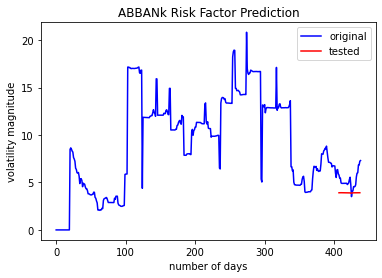

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(avgt)+look_back, :] = avgt
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(avgt)+(look_back*2)+1:len(df)-1, :] = avg
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')

plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:
len(test_data)

132

In [ ]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:
day_new

In [ ]:
day_pred

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)